### 1. Setting specifications

In [1]:
global graph_opts title(, justification(left) color(black) span pos(11)) graphregion(color(white)) ylab(,angle(0) nogrid) xtit(,placement(left) justification(left)) yscale(noline) xscale(noline) legend(region(lc(none) fc(none)))

### 2. Uploading data 

In [2]:
use "https://github.com/SaoriIwa/Stata-IE-Visual-Library/raw/master/Library/Charts/Chart%20of%20comparison%20of%20marginal%20effects%20from%20different%20models/data.dta", clear

### 3. Creating the graph with regression results

In [3]:
cap mat drop theResults
	local theLabels ""
	local x = 15.5

	qui foreach var of varlist ??_correct refer med_any med_class_any_6 med_class_any_16 {

		local theLabel : var label `var'
		local theLabels `"`theLabels' `x' "`theLabel'""'
		local x = `x' - 2
	
		reg `var' facility_private i.case_code 
		
		mat a = r(table)
			local b = a[1,1]
			local ll = a[5,1]
			local ul = a[6,1]
			mat a = [`b',`ll',`ul',1]
			
			mat rownames a = "`var'"
		
		logit `var' facility_private i.case_code 
			margins , dydx(facility_private)
		
		mat b = r(table)
			local b = b[1,1]
			local ll = b[5,1]
			local ul = b[6,1]
			mat b = [`b',`ll',`ul',2]
			
			mat rownames b = "`var'"
			
		mat theResults = nullmat(theResults) \ a \ b 
		
		}

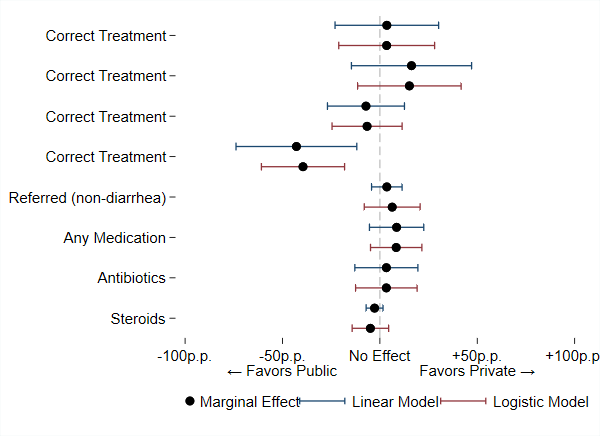

In [4]:
mat colnames theResults = "b" "ll" "ul" "type"
qui matlist theResults

	clear
qui svmat theResults , names(col)
	
qui gen n = _n
qui replace n = 17-n

	tw ///
		(rcap ll ul n if type == 1 , hor lc(navy)) ///
		(scatter n b if type == 1 , mc(black)) ///
		(rcap ll ul n if type == 2 , hor lc(maroon)) ///
		(scatter n b if type == 2 , mc(black)) ///
		, $graph_opts ylab(`theLabels') ytit(" ") xlab(-1 "-100p.p." -.5 `""-50p.p." "{&larr} Favors Public""' 0 "No Effect" .5 `""+50p.p." "Favors Private {&rarr}""' 1 "+100p.p.") ///
			xline(0 , lc(gs12) lp(dash)) legend(order(2 "Marginal Effect" 1 "Linear Model" 3 "Logistic Model") r(1))

### 4. Exporting the graph

In [5]:
qui graph export "figure.png" , replace width(2000)